In [26]:
import use
import histogram_processing as h_o
import neighbourhood_operations as n_o
import edge_detection as e_d
import hough as h
import huffman as hf

import os
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk

## Histogram Processing

In [14]:
# display images in data directory
path=os.path.join(os.getcwd(),'image_data')
create_path = lambda image : os.path.join(path,image)
images=os.listdir(path)
images

['.ipynb_checkpoints',
 '8-escudos-México-1744.jpg',
 'box.jpg',
 'box1.png',
 'DeborahVesuvio.jpg',
 'GrandCanyon.jpg',
 'Sophia-Loren-con-fondo-degradado.jpg']

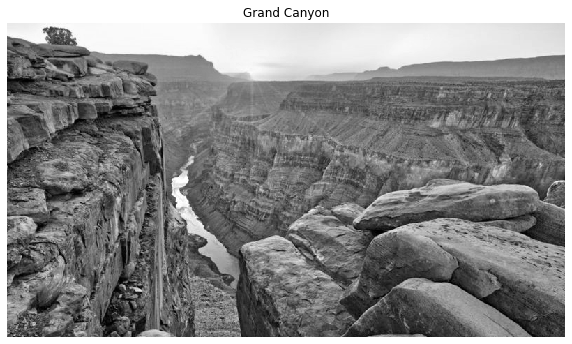

grayscale image made, 1 array of image dimensions, shape: (450, 800)


In [9]:
canyon=use.load_gray_image(os.path.join(path,'GrandCanyon.jpg')) # get grayscale image
gray_shape=canyon.shape

use.imshow(canyon,title='Grand Canyon')
print('grayscale image made, 1 array of image dimensions, shape: {}'.format(gray_shape))

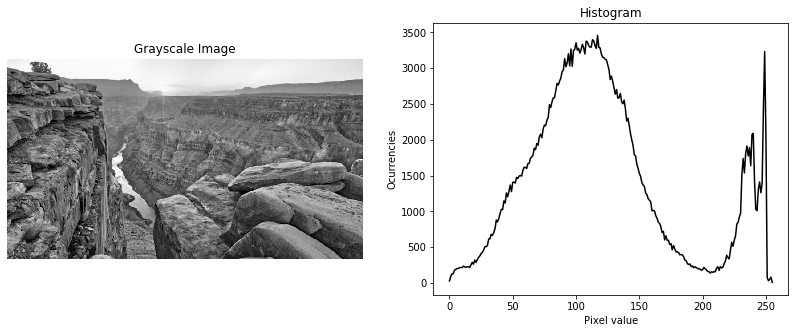

In [19]:
hist=h_o.get_histogram(canyon,256)
fig,axs=plt.subplots(1,2,figsize=(14,5))
axs[0].set_title('Grayscale Image')
axs[0].imshow(canyon,cmap='gray')
axs[0].axis('off')
axs[1].plot(hist,'-k')
axs[1].set_title('Histogram')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Ocurrencies')
plt.show()

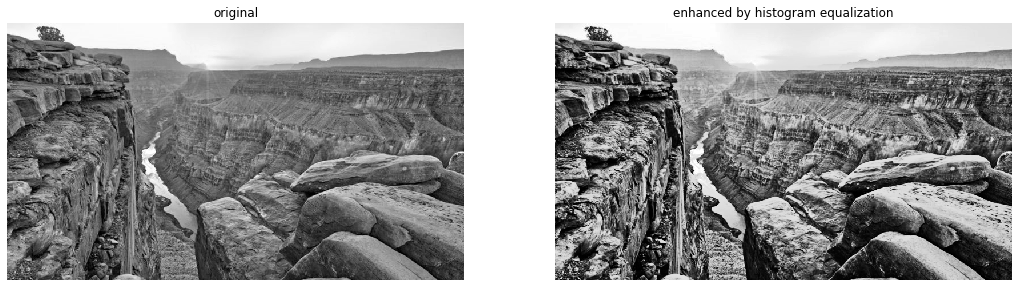

In [23]:
canyon_flat = np.asarray(canyon.flatten(),dtype=int) # store a flat, integer pixel version of the image

hist=h_o.get_histogram(canyon,256) 

histcum=h_o.hist_cum(hist) # calculate cumulative histogram

enhanced_canyon=histcum[canyon_flat] # retreive flat version of the improved image

hist_after=h_o.get_histogram(enhanced_canyon,256)

use.showhimgs([canyon,enhanced_canyon.reshape((450,800))],titles=['original','enhanced by histogram equalization'])

In [24]:
# ENTROPY CALCULATION
entropy_before=(hist*np.log(hist)).sum() # store image entropy before transformation
hist_after=hist_after[hist_after.nonzero()]
entropy_after=(hist_after*np.log(hist_after)).sum() # only for the non zero values of the new histogram, since the zero values does not contribute to entropy
print('entropy before : {:.3f} entropy after: {:.3f}'.format(entropy_before,entropy_after))

entropy before : 2725567.990 entropy after: 2782533.765


In [25]:
# define some masks
a3=1/3*np.array([[1,1,1]])
a4=1/4*np.array([[1,1,1,1]])
b2=0.25*np.array([[1,2,1]])
b4=1/16*np.array([[1,4,6,4,1]])
a3x3=np.dot(a3.T,a3)
a4x4=np.dot(a4.T,a4)
b3x3=np.dot(b2.T,b2)
b4x4=np.dot(b4.T,b4)

In [29]:
images

['8-escudos-México-1744 (1).jpg',
 'box (1).jpg',
 'DeborahVesuvio.jpg',
 'GrandCanyon.jpg',
 'Sophia-Loren-con-fondo-degradado.jpg']

## Neigbourhood Operations

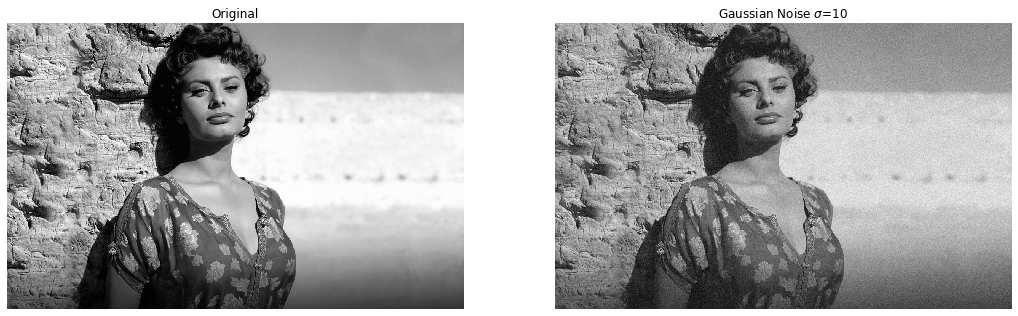

In [32]:
I=use.load_gray_image(create_path('Sophia-Loren-con-fondo-degradado.jpg'))
I_noise=I+np.random.normal(scale=10,size=I.shape) # add noise
I_WM=n_o.conv2d(I_noise,b3x3)
I_Median=n_o.median(I_noise,3)
use.showhimgs([I,I_noise],titles=['Original','Gaussian Noise $\sigma$=10'])

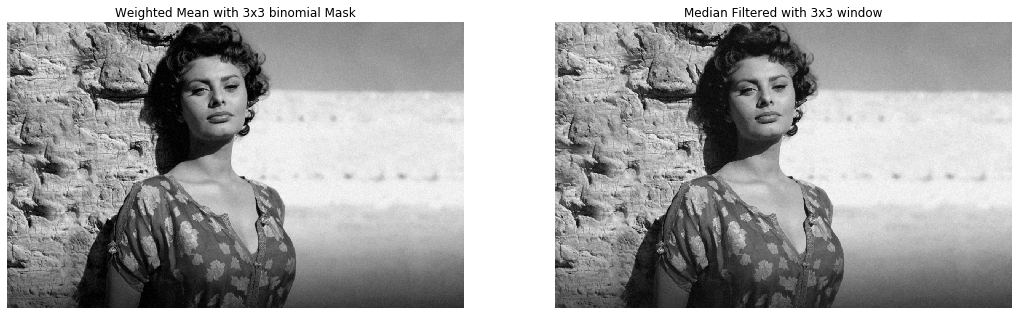

In [34]:
use.showhimgs([I_WM,I_Median],titles=['Weighted Mean with 3x3 binomial Mask','Median Filtered with 3x3 window'])

## Edge Detection

In [18]:
# define sobel operators
Sy=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Sx=Sy.T

In [39]:
images

['8-escudos-México-1744 (1).jpg',
 'box (1).jpg',
 'DeborahVesuvio.jpg',
 'GrandCanyon.jpg',
 'Sophia-Loren-con-fondo-degradado.jpg']

mirror mode on
mirror mode on


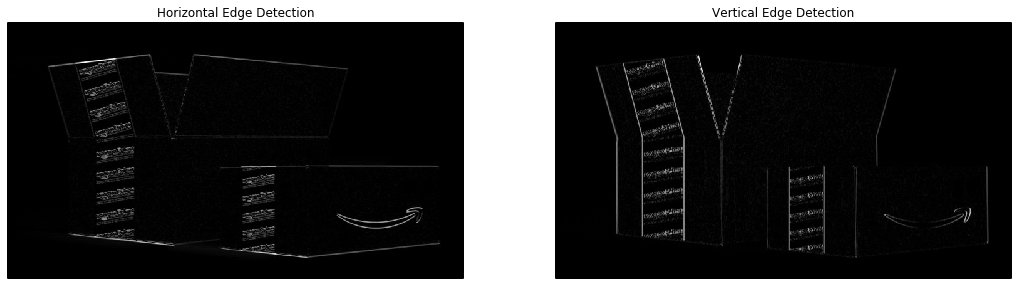

In [40]:
amazon_box=use.load_gray_image(create_path('box.jpg'))
box_x,box_y=n_o.conv2d(amazon_box,Sx,padding='mirror'),n_o.conv2d(amazon_box,Sy,padding='mirror')
use.showhimgs(ims=[box_x,box_y],titles=['Horizontal Edge Detection','Vertical Edge Detection'])

C:\Users\engd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\engd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\engd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arctan
  


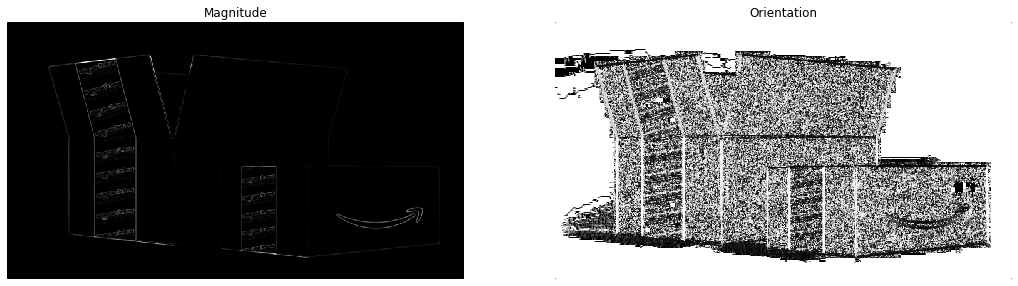

In [41]:
box_m=box_x**2+box_y**2
box_o=np.absolute(np.arctan(box_y/box_x))
use.showhimgs(ims=[box_m,box_o],titles=['Magnitude','Orientation'])

mirror mode on
mirror mode on


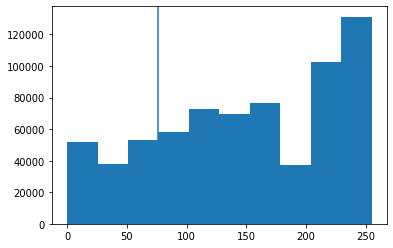

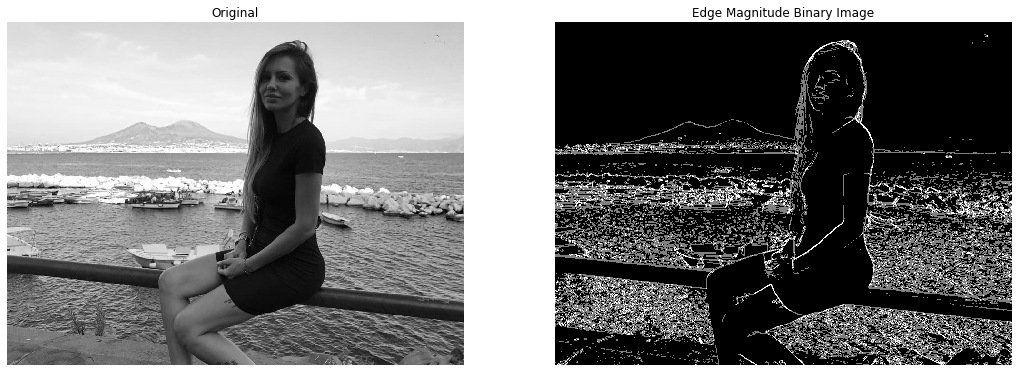

In [44]:
dV=use.load_gray_image(create_path('DeborahVesuvio.jpg'))
dV_x,dV_y=n_o.conv2d(dV,Sx),n_o.conv2d(dV,Sy)
dV_binary=e_d.edgebinary(dV,Sx,hist=True,thershold=3)**2+e_d.edgebinary(dV,Sy,thershold=3)**2
use.showhimgs(ims=[dV,dV_binary],titles=['Original','Edge Magnitude Binary Image'])

In [45]:
# masks to detect diagonal edges
mdiag=np.array([[ 0, -1, -2],[ 1,  0, -1],[ 2,  1,  0]])
sdiag=mdiag[::-1]

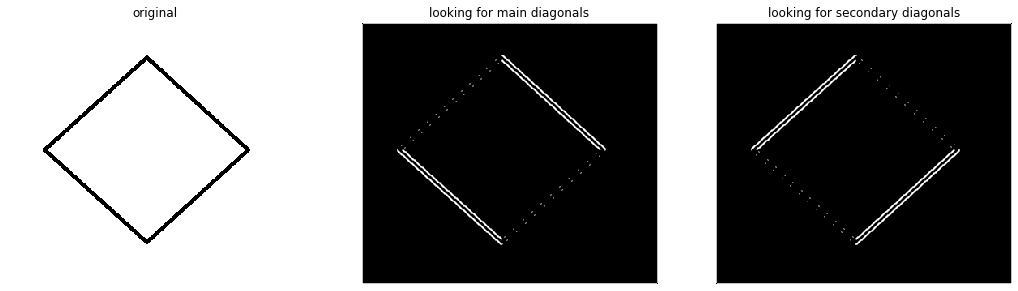

In [47]:
box3=use.load_gray_image(create_path('box1.png'))
use.showhimgs([box3,n_o.conv2d(box3,mdiag),n_o.conv2d(box3,sdiag)],titles=['original','looking for main diagonals','looking for secondary diagonals'])

## Hough Transform

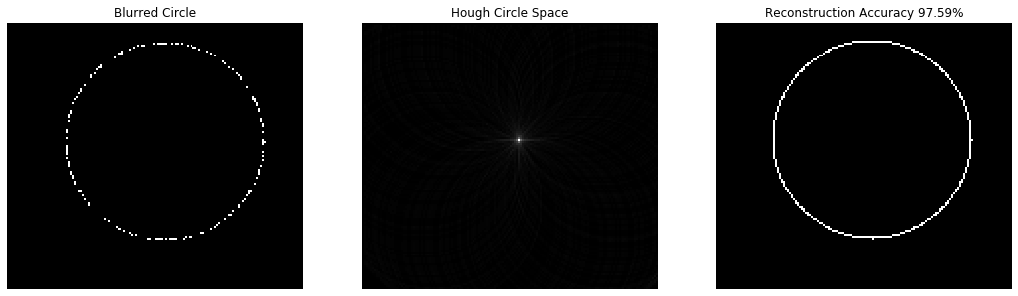

In [21]:
circle=h.draw_circles(np.zeros((135,150)),[[50]],[(60,80)])
circle=circle*(np.random.normal(size=circle.shape,scale=10)>1).astype('int') # blurr circle
houghspace1=h.Hough_circles(circle,[[50]])
estimated_circle_centre=np.argwhere(houghspace1[0]==houghspace1[0].max())[0].tolist()
circle_reconstruted=h.draw_circles(np.zeros((135,150)),[[50]],[estimated_circle_centre]) # draw predicted circle
use.showhimgs([circle,houghspace1[0],circle_reconstruted],titles=['Blurred Circle','Hough Circle Space','Reconstruction Accuracy 97.59%'])

In [16]:
images

['.ipynb_checkpoints',
 '8-escudos-México-1744.jpg',
 'box.jpg',
 'box1.png',
 'DeborahVesuvio.jpg',
 'GrandCanyon.jpg',
 'Sophia-Loren-con-fondo-degradado.jpg']

mirror mode on


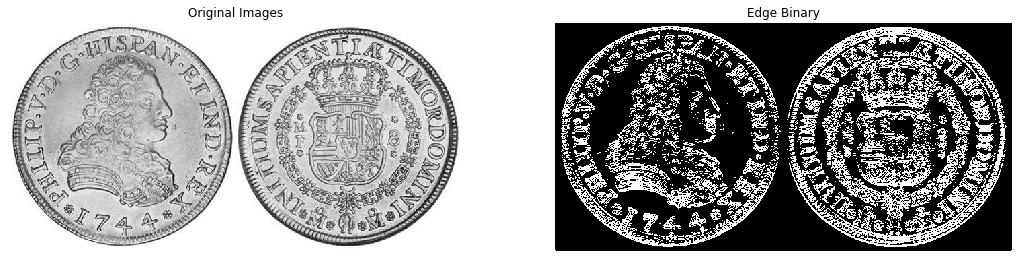

In [19]:
coins=use.load_gray_image(create_path('8-escudos-México-1744.jpg'))
coins_edges=e_d.edgebinary(coins,Sx)
use.showhimgs([coins,coins_edges],titles=['Original Images','Edge Binary'])

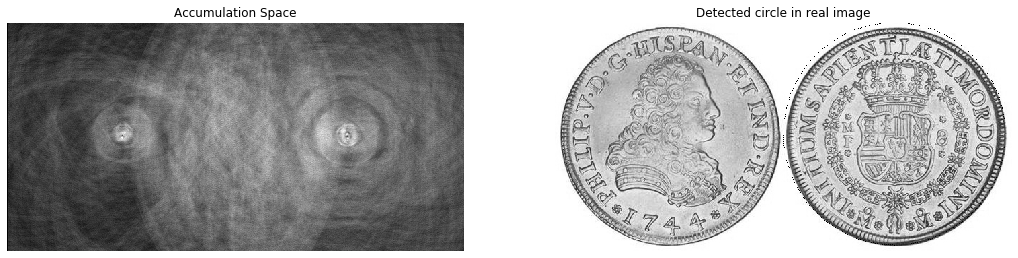

In [23]:
HScoins=h.Hough_circles(coins_edges,165)[0]
coins_circles_detected=h.draw_circles(coins,[165],[tuple(np.argwhere(HScoins.max()==HScoins)[0])])
use.showhimgs([HScoins,coins_circles_detected],titles=['Accumulation Space','Detected circle in real image'])

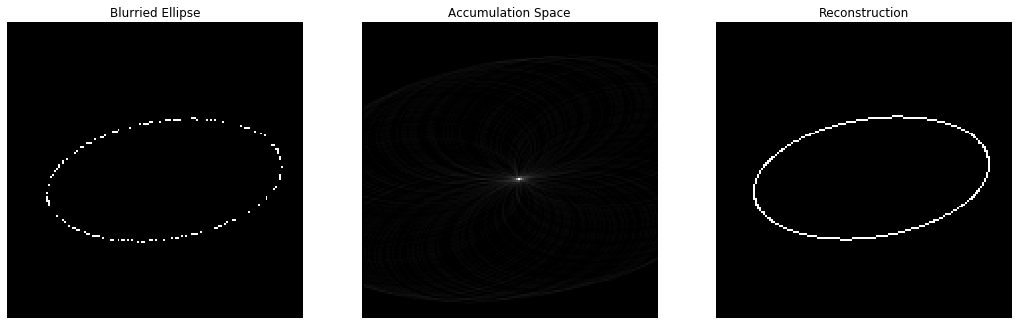

In [24]:
ellipse=h.draw_ellipses(np.zeros((150,150)),params=[(80,80,60,30,30)])
ellipse*=ellipse*(np.random.normal(size=ellipse.shape,scale=10)>1).astype('int')
HSellipse=h.Hough_ellipses(ellipse,[(60,30,30)])
estimated_centre=(np.argwhere(HSellipse[0].max()==HSellipse[0])[0])
Recostruction=h.draw_ellipses(np.zeros((150,150)),params=[(estimated_centre[0],estimated_centre[1],60,30,30)])
use.showhimgs([ellipse,HSellipse[0],Recostruction],titles=['Blurried Ellipse','Accumulation Space','Reconstruction'])

## Lossless Coding

In [27]:
source1 = {'A': 0.25, 'B': 0.25 , 'C': 0.2, 'D':0.2,'E':0.1}
source2  = {'A': 0.1, 'B': 0.2 , 'C': 0.1, 'D':0.3,'E':0.3}
code1,code2 = hf.Huffman(source1),hf.Huffman(source2)
print(f'Source 1 Huffman encoding: {code1}\nSource 2 Huffman encoding: {code2}')

Source 1 Huffman encoding: {'B': '01', 'D': '11', 'A': '10', 'E': '001', 'C': '000'}
Source 2 Huffman encoding: {'D': '01', 'E': '00', 'B': '11', 'A': '101', 'C': '100'}


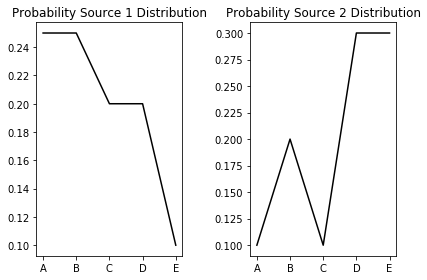

In [28]:
fig,axs=plt.subplots(1,2)
axs[0].set_title('Probability Source 1 Distribution')
axs[0].plot(list(source1.keys()),list(source1.values()),'-k')
axs[1].set_title('Probability Source 2 Distribution')
axs[1].plot(list(source2.keys()),list(source2.values()),'-k')

plt.tight_layout()

In [29]:
sequence1 = np.random.choice(list(source1.keys()), 500, p=list(source1.values()))
sequence2 = np.random.choice(list(source2.keys()),500,p=list(source2.values()))

In [30]:
sequence1

array(['A', 'D', 'B', 'B', 'C', 'B', 'A', 'B', 'E', 'A', 'C', 'A', 'E',
       'C', 'A', 'D', 'A', 'B', 'D', 'A', 'A', 'C', 'A', 'B', 'A', 'B',
       'B', 'A', 'D', 'B', 'A', 'C', 'E', 'A', 'A', 'A', 'C', 'D', 'B',
       'B', 'D', 'D', 'C', 'B', 'D', 'B', 'D', 'B', 'C', 'B', 'E', 'C',
       'B', 'C', 'B', 'B', 'B', 'B', 'D', 'C', 'A', 'C', 'A', 'B', 'D',
       'C', 'A', 'D', 'B', 'D', 'D', 'C', 'B', 'A', 'A', 'C', 'E', 'C',
       'C', 'A', 'C', 'A', 'B', 'E', 'B', 'A', 'C', 'E', 'B', 'A', 'A',
       'D', 'A', 'B', 'A', 'C', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'E',
       'D', 'A', 'A', 'C', 'C', 'B', 'C', 'A', 'A', 'C', 'D', 'D', 'A',
       'A', 'A', 'D', 'A', 'D', 'B', 'D', 'C', 'D', 'B', 'A', 'D', 'D',
       'A', 'B', 'C', 'A', 'C', 'B', 'A', 'B', 'C', 'E', 'B', 'C', 'D',
       'D', 'A', 'B', 'D', 'B', 'E', 'C', 'B', 'B', 'C', 'A', 'B', 'C',
       'C', 'C', 'A', 'D', 'B', 'B', 'C', 'A', 'D', 'D', 'D', 'D', 'C',
       'B', 'B', 'E', 'A', 'A', 'C', 'C', 'A', 'C', 'D', 'E', 'A

In [32]:
# sequence of 500 symbols drawn from source 1:
out_encoded1=hf.encoder(sequence1,code1)
print(out_encoded1)

['10' '11' '01' '01' '000' '01' '10' '01' '001' '10' '000' '10' '001'
 '000' '10' '11' '10' '01' '11' '10' '10' '000' '10' '01' '10' '01' '01'
 '10' '11' '01' '10' '000' '001' '10' '10' '10' '000' '11' '01' '01' '11'
 '11' '000' '01' '11' '01' '11' '01' '000' '01' '001' '000' '01' '000'
 '01' '01' '01' '01' '11' '000' '10' '000' '10' '01' '11' '000' '10' '11'
 '01' '11' '11' '000' '01' '10' '10' '000' '001' '000' '000' '10' '000'
 '10' '01' '001' '01' '10' '000' '001' '01' '10' '10' '11' '10' '01' '10'
 '000' '000' '000' '01' '01' '01' '000' '01' '001' '11' '10' '10' '000'
 '000' '01' '000' '10' '10' '000' '11' '11' '10' '10' '10' '11' '10' '11'
 '01' '11' '000' '11' '01' '10' '11' '11' '10' '01' '000' '10' '000' '01'
 '10' '01' '000' '001' '01' '000' '11' '11' '10' '01' '11' '01' '001'
 '000' '01' '01' '000' '10' '01' '000' '000' '000' '10' '11' '01' '01'
 '000' '10' '11' '11' '11' '11' '000' '01' '01' '001' '10' '10' '000'
 '000' '10' '000' '11' '001' '10' '11' '11' '10' '001' '01' '

In [33]:
out_decoded1=hf.decoder(out_encoded1,code1)
print(out_decoded1)

['A' 'D' 'B' 'B' 'C' 'B' 'A' 'B' 'E' 'A' 'C' 'A' 'E' 'C' 'A' 'D' 'A' 'B'
 'D' 'A' 'A' 'C' 'A' 'B' 'A' 'B' 'B' 'A' 'D' 'B' 'A' 'C' 'E' 'A' 'A' 'A'
 'C' 'D' 'B' 'B' 'D' 'D' 'C' 'B' 'D' 'B' 'D' 'B' 'C' 'B' 'E' 'C' 'B' 'C'
 'B' 'B' 'B' 'B' 'D' 'C' 'A' 'C' 'A' 'B' 'D' 'C' 'A' 'D' 'B' 'D' 'D' 'C'
 'B' 'A' 'A' 'C' 'E' 'C' 'C' 'A' 'C' 'A' 'B' 'E' 'B' 'A' 'C' 'E' 'B' 'A'
 'A' 'D' 'A' 'B' 'A' 'C' 'C' 'C' 'B' 'B' 'B' 'C' 'B' 'E' 'D' 'A' 'A' 'C'
 'C' 'B' 'C' 'A' 'A' 'C' 'D' 'D' 'A' 'A' 'A' 'D' 'A' 'D' 'B' 'D' 'C' 'D'
 'B' 'A' 'D' 'D' 'A' 'B' 'C' 'A' 'C' 'B' 'A' 'B' 'C' 'E' 'B' 'C' 'D' 'D'
 'A' 'B' 'D' 'B' 'E' 'C' 'B' 'B' 'C' 'A' 'B' 'C' 'C' 'C' 'A' 'D' 'B' 'B'
 'C' 'A' 'D' 'D' 'D' 'D' 'C' 'B' 'B' 'E' 'A' 'A' 'C' 'C' 'A' 'C' 'D' 'E'
 'A' 'D' 'D' 'A' 'E' 'B' 'C' 'E' 'E' 'B' 'C' 'B' 'B' 'A' 'E' 'B' 'A' 'B'
 'B' 'C' 'D' 'E' 'C' 'B' 'D' 'C' 'A' 'C' 'C' 'E' 'E' 'B' 'D' 'A' 'C' 'D'
 'C' 'B' 'C' 'C' 'A' 'A' 'D' 'B' 'D' 'D' 'E' 'E' 'C' 'D' 'D' 'E' 'B' 'E'
 'A' 'A' 'E' 'B' 'C' 'D' 'B' 'C' 'E' 'C' 'C' 'A' 'E

In [34]:
out_encoded1,out_encoded2=hf.encoder(sequence1,code1),hf.encoder(sequence2,code2)
out_decoded1,out_decoded2=hf.decoder(out_encoded1,code1),hf.decoder(out_encoded2,code2)
print((sequence2==out_decoded2).all(),(sequence1==out_decoded1).all())

True True


In [35]:
eff1,eff2 = hf.efficiency(source1),hf.efficiency(source2)
entr1,entr2 = hf.entropy(list(source1.values())),hf.entropy(list(source2.values()))
print('The first source has a efficiency: {:.3f} and entropy {:.3f}\nThe second source has a efficiency: {:.3f} and entropy: {:.3f}'.format( eff1,entr1,eff2,entr2))

The first source has a efficiency: 2.300 and entropy 2.261
The second source has a efficiency: 2.600 and entropy: 2.171


The first source is more efficient than the second one since the efficiency is closer to the entropy in the first case than the second